<a href="https://pandas.pydata.org/"><img src=https://pandas.pydata.org/static/img/pandas.svg width="200" alt="pandas logo"></a>

# Lernmodul zum Datenimport und zur Datenvorbereitung mit pandas

Bei Pandas handelt es sich um eine der beliebtesten Python Library zur Datenanalyse. Diese wird dazu benötigt mit Daten in Form von Tabellen arbeiten zu können. Sie stellt verschiedene Funktionalitäten zum Datenimport, zur Datenanalyse und zur Datenmanipulation zur Verfügung. Mithilfe dieses Lernmoduls soll der Umgang mit Pandas erlernt und geübt werden. Dabei wird der Fokus auf den Datenimport und die Datenvorbereitung gelegt, indem die dafür zur Verfügung stehenden grundlegenden Funktionalitäten erläutert werden. Es wird empfohlen die Aufgaben zwischen den einzelnen Inhalten zu bearbeiten, nachdem die Erläuterungen gelesen wurden. Am Ende des Lernmoduls kann das gesammelte Wissen in einem kleinen Projekt nochmal vertieft werden.

**Übersicht über die Lerninhalte:**

1. [Grundlagen zu Pandas](#grundlagen)  
    1.1 [Pandas importieren](#importPandas)  
    1.2 [Erläuterungen der Datenstrukturen](#datenstrukturen)    
2. [Daten importieren und extrahieren](#import)  
    2.1 [Importieren von Daten aus einer Datenbank](#dbImport)  
    2.2 [Importieren von Daten aus einer csv Datei](#csvImport)  
    2.3 [Zusammenführen von Daten](#mergeData)  
    2.4 [Export von Daten in eine Datenbank](#dbExport)  
    2.5 [Export von Daten in eine csv Datei](#csvExport)  
    2.6 [Übungsteil](#uebungsteil2)  
3. [Daten analysieren](#datenanalyse)  
    3.1 [Anzeigen der Daten](#datenAnzeigen)  
    3.2 [Erstellen einer Kopie der Daten](#kopie)  
    3.3 [Beschreiben der Daten](#datenBeschreiben)  
    3.4 [Zugriff auf Datenwerte](#datenZugriff)  
    3.5 [Bedingte Auswahl von Daten](#datenBedingung)  
    3.6 [Umbenennen von Spaltennamen](#spaltenUmbenennen)  
    3.7 [Datentypen der Spalten](#datentypen)  
    3.8 [Sortieren der Daten](#datenSortieren)  
    3.9 [Übungsteil](#uebungsteil3)  
4. [Daten bereinigen](#datenbereinigung)   
    4.2 [Umgang mit fehlenden Werten](#fehlendeWerte)  
    4.3 [Umgang mit Duplikaten](#duplikate)  
5. [Daten transformieren](#datenmanipulation)  
    5.1 [Manipulation der Datenstruktur](#manipulationDatenstruktur)  
    5.2 [Manipulation von Daten](#manipulationDaten)  
    5.3 [Datenwerte mappen](#mappen)  
    5.4 [Gruppieren von Daten](#gruppieren)  
    5.5 [Diskretisieren von Daten](#manipulationDatenstruktur)  
    5.6 [Ändern des Datenformates](#datenformatAendern)  

**Lernziele:**

Die Teilnehmer erwerben Grundkenntnisse im Umgang mit der Library Pandas. Sie kennen die grundlegenden Datenstrukturen in Pandas und können Daten aus diversen Quellen (z. B. Datenbank, csv-Datei) importieren. Zudem sind sie in der Lage die Daten zu untersuchen und für die weitere Verarbeitung in z. B. ML Modellen vorzubereiten. Dafür beherrschen sie diverse Methoden zur Bereinigung und zur Transformation der Daten, die von Pandas zur Verfügung gestellt werden.

**Voraussetzungen:**
- Grundlegende Python Kenntnisse
- Umgang mit Jupyter Notebooks


**Setup für die Aufgabenüberprüfung**

In [14]:
from taskreview.learningModule import LearningModule

# Lernmodul-Instanz erstellen
pandas_lm = LearningModule('data/lernmodul_pandas.db')

<div style="background-color: #150458 ; padding: 5px; "></div>

## **1** <a id='grundlagen'>Grundlagen zu Pandas</a>

### Pandas installieren

Pandas kann entweder mit Anaconda/ Miniconda installiert werden oder mithilfe von pip:

- Anaconda/ Miniconda: conda install Pandas

- pip: pip install pandas


### **1.1** <a id='importPandas'>Pandas importieren</a>

Nachdem pandas installiert wurde, kann es mit folgender Codezeile importiert werden:

In [5]:
import pandas as pd

### **1.2** <a id='datenstrukturen'>Erläuterungen der Datenstrukturen</a>

Es gibt zwei grundlegende Datenobjekte in pandas: den DataFrame und die Series. Im Folgenden werden diese beiden kurz vorgestellt.

**DataFrame**

Bei einem DataFrame handelt es sich um eine Tabelle mit verschiedenen Einträgen. Ein DataFrame besteht aus drei Bestandteilen: Daten, Spalten und Zeilen. Die Daten können von einem beliebigen Datentyp sein (zum Beispiel Integer, String, Date, Float, Boolean, usw.) und werden mithilfe von Spalten und Zeilen gegliedert. Jede Spalte hat einen Spaltennamen und jede Zeile einen Index als Integer.

In der Praxis werden DataFrames erzeugt, indem Daten aus externen Speichern eingelesen werden. Zu diesen Speichermedien gehören: Datenbanken, csv Dateien und Excel Dateien (siehe Abschnitt [2. Daten importieren und extrahieren](#import)). DataFrames können allerdings auch aus zum Beispiel Listen oder Dictonaries erzeugt werden. Dafür wird der Konstruktur `pd.DataFrame()` genutzt. Beispielhaft wird dies im Folgenden mithilfe eines Dictonary von Listen gezeigt. Dabei bilden die Keys des Dictionary die Spaltennamen und die Values beinhalten eine Liste mit Einträgen.

In [3]:
data = {'Vorname': ['Max', 'Lisa'], 'Nachname': ['Mustermann', 'Musterfrau'], 'Alter': [20, 23], 'Lieblingsfilm': ['Star Wars', 'Titanic']}
 
# Erzeugen eines DataFrames mithilfe des Konstruktors
df = pd.DataFrame(data)
df

,Vorname,Nachname,Alter,Lieblingsfilm
0,Max,Mustermann,20,Star Wars
1,Lisa,Musterfrau,23,Titanic


Anstatt einer aufsteigenden Nummer als Zeilenbeschriftungen soll in manchen Fällen eine eigene Beschriftungen festgelegt werden. Die Liste der Zeilenbeschriftungen wird Index genannt. Mithilfe des `index` Parameters des Konstruktors können eigene Beschriftungen übergeben werden.

In [4]:
df = pd.DataFrame(data, index=['Person 1', 'Person 2'])
df

,Vorname,Nachname,Alter,Lieblingsfilm
Person 1,Max,Mustermann,20,Star Wars
Person 2,Lisa,Musterfrau,23,Titanic


**Series**

Eine Series ist ein eindimensionaler gelabelter Array, das jegliche Datentypen beinhalten kann. Sie kann als eine einzelnen Spalte einer Tabelle angesehen werden. Auch hier können Zeilenbeschriftungen mithilfe des index Parameters hinzugefügt werden. Eine Series hat allerdings keinen Spaltennamen, sondern einen Gesamtnamen. Dieser kann über den Parameter `name` festgelegt werden. Zur Erzeugung einer Series kannn zum Beispiel eine Liste oder ein Dictonary genutzt werden. Im Folgenden wird dies beispielhaft mit einer Liste demonstriert.

In [5]:
# Liste mit Daten
list = ['Max', 'Lisa', 'Sandra', 'Daniel']
# Zeilenbeschriftungen
index = ['Person 1', 'Person 2', 'Person 3', 'Person 4']
  
# Series aus einer Liste erzeugen
ser = pd.Series(list, index, name='Vorname')
print(ser)

Person 1       Max
Person 2      Lisa
Person 3    Sandra
Person 4    Daniel
Name: Vorname, dtype: object


<div style="background-color: #150458 ; padding: 5px; "></div>

## **2** <a id='import'>Datenimport und -export </a>

In den meisten Fällen werden Daten nicht händisch erzeugt, wie im vorherigen Abschnitt, sondern es werden Daten genutzt, die bereits existieren. Diese Daten müssen dafür allerdings zunächst importiert werden. Im folgenden Abschnitt wird der Datenimport aus einer Datenbank oder einer csv Datei näher betrachtet. Aus den importierten Daten soll ein DataFrame erzeugt werden, um die Daten mit pandas für weitere Schritte vorbereiten zu können. Nachdem diese Vorbereitung stattgefunden hat sollen die Daten zwischengespeichert werden. Dafür wird der Datenexport genauer unter die Lupe genommen.

### **2.1** <a id='dbImport'>Importieren von Daten aus einer Datenbank</a>

Zum Herstellung einer Datenbankverbindung muss das Package SQLAlchemy installiert und dann importiert werden. Der Vorteil ist, dass sich dadurch diverse verschiedene Datenbanken einbinden lassen. Wie Verbindungen zu den verschiedenen Datenbanken hergestellt werden können, kann <a href="https://docs.sqlalchemy.org/en/14/core/engines.html">hier</a> eingesehen werden. Im Folgenden wird eine SQLite Datenbank verwendet. Um die Verbindung herzustellen, muss der `create_engine()` Funktion des importierten sqlalchemy Package der Pfad zu der Datenbank übergeben werden. Vor dem Datenbankpfad muss `sqlite:///` geschrieben werden, damit SQLAlchemy weiß, um welche Datenbank es sich handelt. Auf das zurückgegebene Engine Objekt muss die Methode `connect()` aufgerufen werden, um sich mit der jeweiligen Datenbank zu verbinden. Mithilfe der Funktion `read_sql_query()` können dann diverse SQL Abfragen ausgeführt werden. Der Funktion werden dafür die SQL Abfrage und die Datenbankverbindung übergeben. Die abgefragten Daten werden automatisch in einen DataFrame gespeichert. Nach Beendigung der Abfragen sollte die Datenbankverbindung wieder geschlossen werden.

In [17]:
import sqlalchemy as db

# Herstellen der Datenbankverbindung
engine = db.create_engine('sqlite:///data/lernmodul_pandas.db')
con = engine.connect()

# Auslesen der Daten aus der Datenbank und Speicherung der Daten in einem DataFrame
netflix_titles_df = pd.read_sql_query('SELECT * from netflix_titles', con)

# Schließen der Datenbankverbindung
con.close()

Zum Verifizieren, dass die Daten importiert und in dem DataFrame gespeichert wurden, kann zum Beispiel die Anzahl der Tabellenzeilen abgefragt werden. Dafür kann die Python Funktion `len()` genutzt werden.

**2.1.1 Nutze die Funktion `len()`, um zu verifizieren, dass Daten importiert wurden. Wie viele Zeilen sind in dem importieren Daten enthalten?**

In [18]:
# Platz für Code
len(netflix_titles_df)

6234

In [19]:
pandas_lm.show_task(211)

Output()

Output()

Output()

### **2.2** <a id='csvImport'>Importieren von Daten aus einer csv Datei</a>

Mithilfe der pandas Funktion `read_csv()` können Daten aus einer csv Datei als pandas DataFrame importiert werden. 

In [20]:
netflix_titles_df = pd.read_csv('data/netflix_titles.csv')

In [21]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Durch die Methode `head()` eines DataFrames werden die ersten 5 Zeilen des DataFrames angezeigt. Dies kann auch zur Verifizierung genutzt werden.

**2.2.2 Nutze die Methode `head()` eines DataFrames, um den Datenimport zu verifizieren. Welchen Titel trägt der Film in der zweiten Zeile?**

In [22]:
# Platz für Code
df_head = netflix_titles_df.head()

In [23]:
#TODO Single Choice
pandas_lm.show_task(222)

Output()

Output()

Output()

### **2.3** <a id='mergeData'>Zusammenführen von Daten</a>

Manchmal sind nicht alle Daten in einer einzigen Datenquelle vorhanden, um denoch alle relevanten Informationen in einem DataFrame vorliegen zu haben, müssen die einzelnen DataFrames mithilfe der `merge()` Methode eines DataFrames zusammengeführt werden. 

In dem DataFrame `liebingsshow_df` ist jeweils die Lieblingsshow von unterschiedlichen Personen eingetragen. Leider ist aus der ID der Show nicht direkt ersichtlich, um welche es sich genau handelt. Um diese Information zu erhalten muss in dem vorherige erstellten DataFrame `netflix_titles_df` nachgesehen werden. In diesem Fall macht es Sinn die beiden DataFrames zu mergen. Damit zwei DataFrames miteinander gemerged werden können ist es wichtig, dass ein eindeutiger Identifier vorliegt, über den die beiden DataFrames verbunden werden können. In dem Beispiel wäre das die Spalte `show_id`.


In [24]:
lieblingsshows = {'ID': [1, 2, 3, 4], 'Name': ['Lena', 'Hannah', 'Sam', 'Sebastian'], 'show_id': [80057969, 80117902, 70234439, 70196145]}
lieblingsshows_df = pd.DataFrame.from_dict(lieblingsshows)

# on - Spaltennamen durch die die beiden DataFrames gemerged werden sollen
# how - auf welche Art und Weise die DataFrames gemerged werden sollen (left, right, outer, inner)
merged_df = lieblingsshows_df.merge(netflix_titles_df, how= 'left', on='show_id')

In [25]:
merged_df

,ID,Name,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Lena,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...
1,2,Hannah,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
2,3,Sam,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,4,Sebastian,70196145,TV Show,New Girl,NaN,"Zooey Deschanel, Jake Johnson, Max Greenfield,...",United States,"April 11, 2019",2017,TV-14,7 Seasons,"Romantic TV Shows, TV Comedies","Still rebounding from a breakup, Jessica Day m..."


### **2.4** <a id='dbExport'>Export von Daten in eine Datenbank</a>

Im Folgenden wird gezeigt, wie ein DataFrame wieder als Datenbanktabelle exportiert werden kann. Dafür wird erneut die SQLite Datenbank genutzt. Nachdem die Verbindung zu der Datenbank hergestellt wurde, kann mithilfe der Methode `to_sql()` der jeweilige DataFrame als Datenbanktabelle exportiert werden. Dafür müssen als Parameter der Name der zu erstellenden Datenbanktabelle sowie die Datenbankverbindung übergeben werden. Optional kann zum Beispiel verhindert werden, dass der Index mit exportiert wird. Ein DataFrame kann defaultmäßig nur einmal in dieselbe Datenbanktabelle exportiert werden, d. h. bei der zweiten Ausführung würde eine Exception geworfen werden, weil die Datenbanktabelle bereits existiert. In diesem Fall kann mithilfe des Parameters `if_exist` festgelegt werden, dass die existierende Tabelle überschrieben werden soll.

In [26]:
# Herstellen der Datenbankverbindung
engine = db.create_engine('sqlite:///data/lernmodul_pandas.db')
con = engine.connect()

# Erzeugen einer Datenbanktabelle auf der Basis eines DataFrames
merged_df.to_sql('lieblingsshows', con, index = False, if_exists="replace")

# Auslesen der Daten aus der Datenbank zur Überprüfung, ob die Tabelle erstellt wurde
db_export_df = pd.read_sql_query('SELECT * from lieblingsshows', con)

# Schließen der Datenbankverbindung
con.close()

db_export_df

,ID,Name,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Lena,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...
1,2,Hannah,80117902,TV Show,Fire Chasers,None,None,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
2,3,Sam,70234439,TV Show,Transformers Prime,None,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,4,Sebastian,70196145,TV Show,New Girl,None,"Zooey Deschanel, Jake Johnson, Max Greenfield,...",United States,"April 11, 2019",2017,TV-14,7 Seasons,"Romantic TV Shows, TV Comedies","Still rebounding from a breakup, Jessica Day m..."


### **2.5** <a id='csvExport'>Export von Daten in eine csv Datei</a>

Alternativ zur Datenbanktabelle können die Daten auch als csv Datei exportiert werden. Hierfür wird die DataFrame Methode `to_csv()` benötigt. Der Methode wird dann der Dateiname der zu erstellenden csv-Datei übergeben. Optional kann auch ein Dateipfad angegeben werden, wenn die Datei nicht in dem aktuellen Verzeichnis erstellt werden soll. Mithilfe des Parameters `index` kann festgelegt werden, ob der Index des DataFrames auch exportiert werden soll.

In [27]:
# Export des DataFrames als csv-Datei
merged_df.to_csv('data/export_test.csv', index=False)

# Import der csv-Datei, um die Erstellung der Datei zu verifizieren
csv_export_df = pd.read_csv('data/export_test.csv')

csv_export_df

,ID,Name,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Lena,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...
1,2,Hannah,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
2,3,Sam,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,4,Sebastian,70196145,TV Show,New Girl,NaN,"Zooey Deschanel, Jake Johnson, Max Greenfield,...",United States,"April 11, 2019",2017,TV-14,7 Seasons,"Romantic TV Shows, TV Comedies","Still rebounding from a breakup, Jessica Day m..."


<div style="background-color: #FFCA00 ; padding: 5px; "></div>

### **2.6** <a id='uebungsteil2'>Übungsteil</a>

**2.6.1 Importiere die Spalten `show_id` und `title` aus der Datenbanktabelle "netflix_titles" (Pfad zur Datenbank: data/lernmodul_pandas.db) in einen DataFrame.**

In [28]:
#########################################################################
###################TODO Lösung entfernen ################################
#########################################################################

# Herstellen der Datenbankverbindung
engine = db.create_engine('sqlite:///data/lernmodul_pandas.db')
con = engine.connect()
# Auslesen der Daten aus der Datenbank und Speicherung der Daten in einem DataFrame
show_title_df = pd.read_sql_query('SELECT show_id, title from netflix_titles', con)

# Schließen der Datenbankverbindung
con.close()

#########################################################################
#########################################################################
#########################################################################

# Aufgabenauswertung
pandas_lm.show_task(261, show_title_df)

,show_id,title
0,247747,Amar Akbar Anthony
1,269880,Bad Boys
2,281550,La Bamba
3,284890,Barsaat
4,292118,Beavis and Butt-head Do America
...,...,...
6229,81224868,Robot Trains
6230,81227195,Kalushi: The Story of Solomon Mahlangu
6231,81228864,Blitz Patrollie
6232,81235603,Sym-Bionic Titan


Output()

Output()

**2.6.2 Lisa, Jan, Dirk und Verena veranstalten einen Filmabend. Jeder von ihnen bringt einen Film dafür mit. Finde heraus, wie die Filme heißen, die sie mitbringen! Erstelle einen DataFrame in dem steht, wer welchen Filmtitle mitbringt. Der DataFrame sollte am Ende wie die folgende Tabelle aufgebaut sein.** 

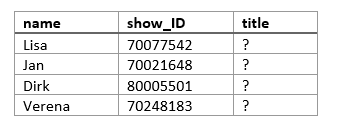

In [29]:
filmabend = {'name': ['Lisa', 'Dirk', 'Jan', 'Verena'], 'show_id': [70077542, 70021648, 80005501, 70248183]}

#########################################################################
###################TODO Lösung entfernen ################################
#########################################################################

filmabend_df = pd.DataFrame.from_dict(filmabend)

filmabend_titel_df = filmabend_df.merge(show_title_df, how= 'left', on='show_id')

#########################################################################
#########################################################################
#########################################################################

# Aufgabenauswertung
pandas_lm.show_task(262, filmabend_titel_df)

,name,show_id,title
0,Lisa,70077542,The Bucket List
1,Dirk,70021648,Charlie and the Chocolate Factory
2,Jan,80005501,Iron Man & Captain America: Heroes United
3,Verena,70248183,Cloud Atlas


Output()

Output()

**2.6.3 Exportiere den in Aufgabe 1 und 2 entstandenen DataFrame in die Datanbanktabelle "netflix_titles_filmabend" der Datenbank lernmodul_pandas.db.**

In [30]:
#########################################################################
###################TODO Lösung entfernen ################################
#########################################################################

# Herstellen der Datenbankverbindung
engine = db.create_engine('sqlite:///data/lernmodul_pandas.db')
con = engine.connect()

# Erzeugen einer Datenbanktabelle auf der Basis eines DataFrames
filmabend_titel_df.to_sql('netflix_titles_filmabend', con, index = False, if_exists="replace")

# Schließen der Datenbankverbindung
con.close()
#########################################################################
#########################################################################
#########################################################################

# Aufgabenauswertung
pandas_lm.show_task(263, filmabend_titel_df)

,name,show_id,title
0,Lisa,70077542,The Bucket List
1,Dirk,70021648,Charlie and the Chocolate Factory
2,Jan,80005501,Iron Man & Captain America: Heroes United
3,Verena,70248183,Cloud Atlas


Output()

Output()

<div style="background-color: #150458 ; padding: 5px; "></div>

## **3** <a id='datenanalyse'>Datenanalyse</a>

In dem folgenden Abschnitt wird erläutert, wie die Daten innerhalb eines DataFrames betrachtet werden können. Zudem kann es zur Datenanalyse hilfreich sein, sich zusätzliche Informationen zu den Daten anzeigen zu lassen, zum Beispiel die Lageparameter oder die Anzahl der Spalten und Zeilen. Mit Bedingungen können nur bestimmte Zeilen eines DataFrames ausgewählt werden, um einen genaueren Blick auf diese zu werfen oder die Daten können nach bestimmten Spalten sortiert werden. Nachdem die Daten importiert und analysiert wurden, kann es hilfreich sein Spaltennamen umzubenennen. Zum Beispiel, wenn die Namen nicht aussagekräftig genug sind. Auch kann es hilfreich sein den Datentyp von Spalten zu ändern, wenn bei der Analyse festgestellt wurde, dass dieser nicht übereinstimmt.

### **3.1** <a id='datenAnzeigen'>Anzeigen der Daten</a>

In einem Jupyter Notebook kann ein DataFrame einfach angezeigt werden, indem der Name des DataFrames in eine Zelle geschrieben und diese ausgeführt wird.

In [20]:
netflix_titles_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


Mit den Methoden `head()` und `tail()` können jeweils die ersten oder letzten Datenreihen eines Dataframes angezeigt werden. Defaultmäßig werden 5 Datenreihen zurückgegeben. Sollen mehr oder weniger Datenreihen angezeigt werden kann die Anzahl der gewünschten Reihen der Methode als Parameter übergeben werden.

In [21]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [22]:
netflix_titles_df.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


### **3.2** <a id='kopie'>Erstellen einer Kopie der Daten</a>

An manchen Stellen kann es sinnvoll sein, eine Kopie des DataFrames zu erstellen, um zum Beispiel die originalen Daten zu behalten. Dafür gibt es die Methode `copy()`. Wird eine Kopie eines DataFrames berarbeitet werden ausschließlich die Daten der Kopie verändert.

In [23]:
netflix_titles_copy = netflix_titles_df.copy()

### **3.3** <a id='datenBeschreiben'>Beschreiben der Daten</a>

Das `shape` Attribut kann dazu genutzt werden zu schauen, wie groß der DataFrame ist. Unser DataFrame hat 6234 Einträge mit 12 Spalten

In [24]:
netflix_titles_df.shape

(6234, 12)

Mithilfe der `describe()` Methode können die Lageparameter des DataFrames angezeigt werden. Dies macht nur Sinn für numerische Daten. Die Funktion kann auf den ganzen DataFrame angewendet werden oder auf einzelne Spalten. Im Falle der Netflix Show Daten macht es bei dem aktuellen Stand nur Sinn die Funktion auf die `release_year` Spalte anzuwenden. 

Bei den Lageparametern handelt es sich um folgende:
* count: Die Anzahl der vorhandenen Datenwerte
* mean: Durchschnittlicher Wert
* std: Standardabweichung
* min: Kleinster Wert
* 25%: 25%-Quantil (mindestens 25% der Daten liegen unter diesem Wert)
* 50%: 50%-Quantil, Median
* 75%: 75%-Quantil
* max: Größter Wert

In [25]:
netflix_titles_df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


#########################################################################

###################TODO Multiple COICE AUFGABE###########################

#########################################################################

Welche Erkenntnisse sind durch die `describe` Funktion direkt ersichtlich?
1. Die älteste Show stammt aus dem Jahr 1925.
2. Die aktuellste Show stammt aus dem Jahr 2020
3. 50% der Shows wurden im Jahr 2016 oder später veröffentlicht.
4. 25% der Shows wurden in oder vor 2013 veröffentlicht.
5. Durchschnittlich wurden die Filme im Jahr 2013 veröffentlicht. 


In [26]:
# Aufgabenauswertung
pandas_lm.show_task(331)

'NoneType' object is not subscriptable
Zu dieser Task-ID existiert keine Aufgabe.


Die `describe()` Methode kann allerdings auch nützliche Informationen liefern, wenn sie auf eine String Spalte angewandt wird: 
* count: Anzahl der vorhandenen Werte
* unique: Einzigartige Werte
* top: Am häufigsten vorkommender Wert
* freq: Anzahl der Vorkommen des am häufigsten vorkommenden Wertes

In [27]:
netflix_titles_df['type'].describe()

count      6234
unique        2
top       Movie
freq       4265
Name: type, dtype: object

Mithilfe der Methode `unique()` können diese einzigartigen Werte auch angezeigt werden.

In [28]:
netflix_titles_df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Um zu sehen, wie oft diese einzigartigen Werte in der Spalte vorkommen kann die Methode `value_counts()` genutzt werden.

In [29]:
netflix_titles_df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

### **3.4** <a id='datenZugriff'>Zugriff auf Datenwerte</a>

Um auf die Spalte `title` des `netflix_titles_df` zugreifen zu können kann der Indexing Operator `[]` genutzt werden. Die Spalte des DataFrames wird dann als Series zurückgegeben.

In [30]:
netflix_titles_df['title']

0           Norm of the North: King Sized Adventure
1                        Jandino: Whatever it Takes
2                                Transformers Prime
3                  Transformers: Robots in Disguise
4                                      #realityhigh
                           ...                     
6229                                   Red vs. Blue
6230                                          Maron
6231         Little Baby Bum: Nursery Rhyme Friends
6232    A Young Doctor's Notebook and Other Stories
6233                                        Friends
Name: title, Length: 6234, dtype: object

Alternativ kann auf eine Spalte eines DataFrames wie auf ein Attribut zugegriffen werden.

In [31]:
netflix_titles_df.title

0           Norm of the North: King Sized Adventure
1                        Jandino: Whatever it Takes
2                                Transformers Prime
3                  Transformers: Robots in Disguise
4                                      #realityhigh
                           ...                     
6229                                   Red vs. Blue
6230                                          Maron
6231         Little Baby Bum: Nursery Rhyme Friends
6232    A Young Doctor's Notebook and Other Stories
6233                                        Friends
Name: title, Length: 6234, dtype: object

Um auf einen spezifischen Wert innerhalb einer Spalte zuzugreifen wird der Indexing Operator `[]` ein weiteres Mal verwendet. Das folgende Beispiel gibt den Title der ersten Netfilx Show im DataFrame aus. 

In [32]:
netflix_titles_df['title'][0]

'Norm of the North: King Sized Adventure'

Der Indexing Operator `[]` aus den vorherigen Beispielen wird von Python bereitgestellt, um die Attribute eines Objektes auszulesen. Wie gezeigt, funktioniert dieser auch mit DataFrames. Pandas stellt allerdings auch eigene Operatoren zur Verfügung, mit denen auf die Daten in einem DataFrame zugegriffen werden kann. Diese Operatoren sind `loc` und `iloc`. Bei der Verwendung ist zu beachten, dass bei den Pandas Operatoren zuerst die Zeilen kommen und dann die Spalten. Beim Python Operator ist es genau anders herum.

Bei dem Operator `iloc` basiert die Auswahl der Daten auf ihrer numerischen Position in den Daten. Mit dem Index 0 erhalten wir die Informationen zu der ersten Netflix Show in den Daten. Hier sprechen wir von einer index-basierten Auswahl.

In [33]:
netflix_titles_df.iloc[0]

show_id                                                  81145628
type                                                        Movie
title                     Norm of the North: King Sized Adventure
director                                 Richard Finn, Tim Maltby
cast            Alan Marriott, Andrew Toth, Brian Dobson, Cole...
country                  United States, India, South Korea, China
date_added                                      September 9, 2019
release_year                                                 2019
rating                                                      TV-PG
duration                                                   90 min
listed_in                      Children & Family Movies, Comedies
description     Before planning an awesome wedding for his gra...
Name: 0, dtype: object

Wie bereits erwähnt werden bei dem Pandas Operator `iloc` zunächst die Zeilen betrachtet. Eine Spalte kann wie folgt ausgegeben werden:

In [34]:
netflix_titles_df.iloc[:,0]

0       81145628
1       80117401
2       70234439
3       80058654
4       80125979
          ...   
6229    80000063
6230    70286564
6231    80116008
6232    70281022
6233    70153404
Name: show_id, Length: 6234, dtype: int64

Mithilfe des `:` werden alle Daten ausgewählt. Hinter dem Komma wird der Index der jeweiligen Spalte bzw. der jeweiligen Spalten angegeben. Um die ersten 5 Zeilen der Spalte `titles` auszugeben muss der Spaltenindex `2` verwendet werden, da dies der Position dieser Spalte in dem DataFrame entspricht. Wird `:` in Kombination mit Zahlen verwendet stellt dies immer eine Wertebereich dar. Um die ersten 5 Zeilen auszugeben muss also `:5` eingetragen werden. Was so viel bedeutet wie: Gib mir alle Zeilen bis zu dem Zeilenindex 5 aus. Wobei die Zeile mit dem Index 5 nicht mehr ausgegeben wird.

In [35]:
netflix_titles_df.iloc[:5,2]

0    Norm of the North: King Sized Adventure
1                 Jandino: Whatever it Takes
2                         Transformers Prime
3           Transformers: Robots in Disguise
4                               #realityhigh
Name: title, dtype: object

Mit negativen Zahlen kann auf die Zeilen am Ende des DataFrames zugegriffen werden. Mit dem Index `-1` wird also die letzte Zeile des DataFrames ausgegeben. 

In [36]:
netflix_titles_df.iloc[-1]

show_id                                                  70153404
type                                                      TV Show
title                                                     Friends
director                                                      NaN
cast            Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...
country                                             United States
date_added                                                    NaN
release_year                                                 2003
rating                                                      TV-14
duration                                               10 Seasons
listed_in                          Classic & Cult TV, TV Comedies
description     This hit sitcom follows the merry misadventure...
Name: 6233, dtype: object

Bei dem Operator `loc` basiert die Auswahl der Daten auf den Beschriftungen der Spalten, nicht der Position in den Daten. Hier sprechen wir von einer label-basierten Auswahl. Die Spalten werden in diesem Fall also nicht über einen Index ausgewählt, sondern indem der Name der Spalte eingefügt wird. 

In [37]:
netflix_titles_df.loc[:,'title']

0           Norm of the North: King Sized Adventure
1                        Jandino: Whatever it Takes
2                                Transformers Prime
3                  Transformers: Robots in Disguise
4                                      #realityhigh
                           ...                     
6229                                   Red vs. Blue
6230                                          Maron
6231         Little Baby Bum: Nursery Rhyme Friends
6232    A Young Doctor's Notebook and Other Stories
6233                                        Friends
Name: title, Length: 6234, dtype: object

Zudem ist bei der Verwendung von `iloc` und `loc` zu beachten, dass `iloc` bei der Angabe eines Indexbereiches den letzte Index nicht inkludiert. Bei `loc` wird dieser allerdings mit zurückgegeben. Um die ersten drei Zeilen eines DataFrames auszugeben muss also entweder `iloc[:3]` oder `loc[:2]` verwendet werden. Zu diesem Unterschied kommt es, da bei `loc` Spalten durch deren Namen ausgewähhlt werden können. Hierbei möchte man genau den Bereich der angegebenen Spalten zurück bekommen. 

In [38]:
# Platz zum Ausprobieren
netflix_titles_df.iloc[:, 1:3]

,type,title
0,Movie,Norm of the North: King Sized Adventure
1,Movie,Jandino: Whatever it Takes
2,TV Show,Transformers Prime
3,TV Show,Transformers: Robots in Disguise
4,Movie,#realityhigh
...,...,...
6229,TV Show,Red vs. Blue
6230,TV Show,Maron
6231,Movie,Little Baby Bum: Nursery Rhyme Friends
6232,TV Show,A Young Doctor's Notebook and Other Stories


#########################################################################

###################TODO Multiple Choice Aufgabe ################################

#########################################################################


Welche der folgenden Ausagen sind wahr?
1) Bei dem Operator loc handelt es sich um eine index-basierte Auswahl.
2) Mithilfe des : werden alle Daten ausgewählt.
3) Bei den Pandas Operatoren werden zunächst die Zeilen und dann die Spalten angegeben.
4) Mit iloc[:5] werden alle Zeilen inkl. der Zeile mit dem Indexwert 5 ausgegeben.

### **3.5** <a id='datenBedingung'>Bedingte Auswahl von Daten</a>

Im voherigen Abschnitt haben wir gelernt, wie auf einzelne Spalten, Zeilen oder Zellwerte zugegriffen werden kann. In einige Fällen sollen Daten aufgrund von bestimmten Bedingungen ausgewählt werden. Zum Beispiel wollen wir alle Netflix Shows selektieren, die vom `type` ein `Movie` sind. Mithilfe `netflix_titles_df['type'] == 'Movie'` wird eine Series ausgegeben, die für jede Zeile angibt, ob es sich um einen `Movie` handelt oder nicht.

In [39]:
netflix_titles_df['type'] == 'Movie'

0        True
1        True
2       False
3       False
4        True
        ...  
6229    False
6230    False
6231     True
6232    False
6233    False
Name: type, Length: 6234, dtype: bool

Dies kannn nun mithilfe des Indexing Operators `loc` verwendet werden, um die entsprechenden Zeilen auszugeben. 

In [40]:
netflix_titles_df.loc[netflix_titles_df['type'] == 'Movie'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


Mit den Operatoren `&` und `|` können so verschiedene Bedingungen zusammen verwendet werden. Im Beispiel sollen alle Filme ausgewählt werden, die nach 2018 herausgebracht wurden.

In [41]:
netflix_titles_df.loc[(netflix_titles_df['type'] == 'Movie') & (netflix_titles_df['release_year'] > 2017)].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
27,80203094,Movie,City of Joy,Madeleine Gavin,NaN,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...
30,80988892,Movie,Next Gen,"Kevin R. Adams, Joe Ksander","John Krasinski, Charlyne Yi, Jason Sudeikis, M...","China, Canada, United States","September 7, 2018",2018,TV-PG,106 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When lonely Mai forms an unlikely bond with a ...
31,80239639,Movie,Sierra Burgess Is A Loser,Ian Samuels,"Shannon Purser, Kristine Froseth, RJ Cyler, No...",United States,"September 7, 2018",2018,PG-13,106 min,"Comedies, Romantic Movies",A wrong-number text sparks a virtual romance b...
32,80159586,Movie,The Most Assassinated Woman in the World,Franck Ribière,"Anna Mouglalis, Niels Schneider, André Wilms, ...","Belgium, United Kingdom, United States","September 7, 2018",2018,TV-MA,102 min,"Dramas, International Movies, Thrillers","In 1930s Paris, an actress famous for her gory..."


### **3.6** <a id='spaltenUmbenennen'>Umbenennen von Spaltennamen</a>

Spaltennamen können mit der Methode `rename()` geändert werden. Dieser wir ein Dictonary übergeben, in dem für die aktuellen Spaltennamen neue Namen angegeben werden. Mithilfe von `inplace = True` werden die Änderungen direkt in den DataFrame übernommen. Die Änderungen müssen also nicht mehr durch `netflix_titles_df = ....` in die jeweilige Variable geschrieben werden.

In [42]:
netflix_titles_df.rename(columns = {'show_id':'ID'}, inplace = True) 

In [43]:
netflix_titles_df.head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### **3.7** <a id='datentypen'>Datentypen der Spalten</a>

Um den Datentyp einer Spalte anzuzeigen wird das Attribut `dtype` verwendet. Durch das Attribut `dtypes` werden die Datentypen jeder Spalte des DataFrames angezeigt.

In [44]:
netflix_titles_df.title.dtype

dtype('O')

In [45]:
netflix_titles_df.dtypes

ID               int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Strings haben in DataFrames nicht ihren eigenen Datentyp, sondern erhalten stattdessen den Datentyp `object`. 

Mit der Methode `astype()` können die Datentypen der einzelnen Spalten geändert werden. Datumsangaben können mithilfe der Pandas Funktion `to_datetime()` in Datetime Objekte konvertiert werden.

In [46]:
netflix_titles_df['date_added'] = pd.to_datetime(netflix_titles_df['date_added'])

In [47]:
netflix_titles_df.dtypes

ID                       int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### **3.8** <a id='datenSortieren'>Sortieren der Daten</a>

Um die Daten in einer bestimmten Reihenfolge ausgeben zu können kann die Methode `sort_values()` genutzt werden. Dieser wird der Spaltenname übergeben, nach der die Daten sortiert werden sollen. Es können auch mehrere Spalten angegeben werden, nach denen sortiert werden soll (`['release_year', 'country']`). Defaultmäßig werden die Daten aufsteigend sortiert. Durch `ascending=False` kann eine absteigende Reihenfolge erreicht werden. 

In [48]:
netflix_titles_df.sort_values('release_year').tail()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3189,81039393,TV Show,Cheer,NaN,NaN,United States,2020-01-08,2020,TV-MA,1 Season,"Docuseries, Reality TV, Teen TV Shows",This gripping docuseries follows the ups and d...
3180,81214114,Movie,Bulletproof 2,Don Michael Paul,"Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...",United States,2020-01-09,2020,TV-MA,97 min,"Action & Adventure, Comedies",A special agent abruptly reunites with a crimi...
1315,81034946,TV Show,Maradona in Mexico,NaN,Diego Armando Maradona,"Argentina, United States, Mexico",2019-11-13,2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon..."
3379,81062828,TV Show,Killer Inside: The Mind of Aaron Hernandez,NaN,Aaron Hernandez,United States,2020-01-15,2020,TV-MA,1 Season,"Crime TV Shows, Docuseries","Via interviews with friends, players and insid..."
3464,80237329,TV Show,AJ and the Queen,NaN,"RuPaul Charles, Izzy G., Michael-Leon Wooley, ...",United States,2020-01-10,2020,TV-14,1 Season,"TV Comedies, TV Dramas",While traveling across the country in a run-do...


Mit der Methode `sort_index` kann der DataFrame nach dem Indexwert sortiert werden.

In [49]:
netflix_titles_df.sort_index().head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


<div style="background-color: #FFCA00 ; padding: 5px; "></div>

### **3.9** <a id='uebungsteil3'>Übungsteil</a>

**3.9.1 Gebe in einer Series an, wie oft die einzelnen Ratings bei den Filmen und TV Shows insgesamt vorkommen.**

In [55]:
netflix_titles_df['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

**3.9.2 Gebe die Zeilen 5 bis 8 der Spalten show_ID, title, release_year des DataFrames `netflix_titles_df` aus.**

In [65]:
netflix_titles_df.loc[5:8,['ID','title', 'release_year']]

,ID,title,release_year
5,80163890,Apaches,2016
6,70304989,Automata,2014
7,80164077,Fabrizio Copano: Solo pienso en mi,2017
8,80117902,Fire Chasers,2017


**3.9.3 Lisas kleine Schwester ist 6 Jahre alt. Sie dürfte als nur die Filme schauen mit den Ratings `TV-Y` (Für Kinder zwischen 2 und 6 Jahren) und `G` (Allgemeines Publikum). Welche der Filme auf Netflix dürfte ihre Schwester schauen? Gebe die Filme in einem DataFrame namens `kinder_filme_df` aus.**

In [67]:
kinder_filme_df = netflix_titles_df.loc[(netflix_titles_df['type'] == 'Movie') & ((netflix_titles_df['rating'] == 'TV-Y') | (netflix_titles_df['rating'] == 'G'))]
kinder_filme_df

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
14,80182596,Movie,Krish Trish and Baltiboy: Best Friends Forever,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Deepak...",NaN,2017-09-08,2016,TV-Y,65 min,Children & Family Movies,"A cat, monkey and donkey team up to narrate fo..."
163,81035117,Movie,True: Tricky Treat Day,NaN,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",Canada,2019-09-20,2019,TV-Y,24 min,Children & Family Movies,It's up to True and her friends to save the da...
178,70118953,Movie,Océans,"Jacques Perrin, Jacques Cluzaud","Pierce Brosnan, Jacques Perrin, Rie Miyazawa, ...","France, Switzerland, Spain, United States, Uni...",2019-09-19,2009,G,84 min,"Documentaries, International Movies",This documentary examines the vital role water...
280,80198046,Movie,Ghost of the Mountains,Ben Wallis,Antoine Fuqua,United States,2017-09-13,2017,G,78 min,Documentaries,An international group of filmmakers sets out ...
319,81141689,Movie,Spookley the Square Pumpkin,Bernie Denk,"Sonja Ball, Craig Francis, Rick Jones, Michel ...",United States,2019-09-01,2004,G,47 min,Children & Family Movies,"When a storm terrorizes his patch, a pumpkin c..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5505,60033786,Movie,An American Tail: The Mystery of the Night Mon...,Larry Latham,"Thomas Dekker, Lacey Chabert, Jane Singer, Neh...",United States,2018-04-01,1999,G,75 min,Children & Family Movies,When a monster goes on a mouse-napping spree i...
5506,60033787,Movie,An American Tail: The Treasures of Manhattan I...,Larry Latham,"Thomas Dekker, Dom DeLuise, Pat Musick, Nehemi...",United States,2018-04-01,2000,G,79 min,Children & Family Movies,When Fievel and friends go hunting for buried ...
5507,60022255,Movie,Balto,Simon Wells,"Kevin Bacon, Bob Hoskins, Bridget Fonda, Jim C...",United States,2018-04-01,1995,G,78 min,"Children & Family Movies, Dramas","Balto, who is half wolf and half dog, endures ..."
5508,60022254,Movie,Balto 2: Wolf Quest,Phil Weinstein,"Maurice LaMarche, Jodi Benson, Lacey Chabert, ...",United States,2018-04-01,2001,G,75 min,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice L..."


**3.9.4 Sortiere die Kinderfilme im `kinder_filme_df` absteigend zuerst nach dem Datum, an dem sie zu Netflix hinzugefügt wurden und danach nach dem Jahr in dem sie erschienen sind.**

In [71]:
kinder_filme_sort_df = kinder_filme_df.sort_values(['date_added', 'release_year'], ascending=False)
kinder_filme_sort_df

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3516,70118155,Movie,Garfield's Pet Force,Mark A.Z. Dippé,"Frank Welker, Vanessa Marshall, Gregg Berger, ...","South Korea, United States",2020-01-01,2009,G,78 min,"Children & Family Movies, Comedies",When an alien menace and her army of undead mi...
3527,60021788,Movie,Jimmy Neutron: Boy Genius,John A. Davis,"Debi Derryberry, Jeffrey Garcia, Rob Paulsen, ...",United States,2020-01-01,2001,G,83 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When gooey green aliens kidnap all the adults ...
3599,60020949,Movie,Willy Wonka & the Chocolate Factory,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany",2020-01-01,1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...
3595,1067876,Movie,True Grit,Henry Hathaway,"John Wayne, Glen Campbell, Kim Darby, Jeremy S...",United States,2020-01-01,1969,G,128 min,"Classic Movies, Dramas",Teenage tomboy Mattie Ross enlists the help of...
3496,374651,Movie,Chitty Chitty Bang Bang,Ken Hughes,"Dick Van Dyke, Sally Ann Howes, Lionel Jeffrie...","United Kingdom, United States",2020-01-01,1968,G,146 min,"Children & Family Movies, Classic Movies, Come...",Quirky inventor Caractacus Potts and his famil...
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,80046144,Movie,Magic Snowflake,Luc Vinciguerra,"Nathan Simony, Benoît Allemane, Vincent Grass,...","France, Belgium",2015-12-20,2013,TV-Y,73 min,Children & Family Movies,Young Nicolas agrees to do Santa's work for on...
4720,80073100,Movie,My Little Pony Equestria Girls: Friendship Games,"Ishi Rudell, Jayson Thiessen","Tara Strong, Rebecca Shoichet, Ashleigh Ball, ...",United States,2015-12-01,2015,TV-Y,72 min,"Children & Family Movies, Comedies","Rainbow Dash, Applejack and friends compete ag..."
1724,80028529,Movie,Tinker Bell and the Legend of the NeverBeast,Steve Loter,"Ginnifer Goodwin, Mae Whitman, Rosario Dawson,...",United States,2015-05-17,2014,G,78 min,Children & Family Movies,When suspicious scout fairies scheme to captur...
4462,80012535,Movie,My Little Pony Equestria Girls: Rainbow Rocks,"Jayson Thiessen, Ishi Rudell","Tara Strong, Ashleigh Ball, Andrea Libman, Tab...","United States, Canada",2014-12-17,2014,TV-Y,73 min,"Children & Family Movies, Comedies","Rainbow Dash, Applejack, Pinkie Pie, Rarity an..."


<div style="background-color: #150458 ; padding: 5px; "></div>

## **4** <a id='datenbereinigung'>Datenbereinigung</a>

Nachdem die Daten einer ersten Analyse unterzogen wurden, wird nun beschrieben wie mit fehlenden Werten und Duplikaten in den Daten umgegangen werden kann. Dieser Schritt ist wichtig, um eine gute Qualität der Daten zu gewährleisten.

### **4.1** <a id='fehlendeWerte'>Umgang mit fehlenden Werten</a>

Zellen in denen Datenwerte fehlen erhalten immer den Wert `NaN` (Not a Number). Aus technischen  Gründen sind diese `NaN` Werte immer vom Datentyp `float64`. Um die fehlenden Werte eines DataFrames anzuzeigen, wird `pd.isnull()` genutzt. So können zum Beispiel nur die Zeilen angezeigt werden, die in einer bestimmten Spalte `NaN` Werte stehen haben:

In [50]:
netflix_titles_df[pd.isnull(netflix_titles_df.country)].head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
10,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,NaN,2017-09-08,2017,TV-MA,78 min,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...
12,80182480,Movie,Krish Trish and Baltiboy,NaN,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,2017-09-08,2009,TV-Y7,58 min,Children & Family Movies,"A team of minstrels, including a monkey, cat a..."
13,80182483,Movie,Krish Trish and Baltiboy: Battle of Wits,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,2017-09-08,2013,TV-Y7,62 min,Children & Family Movies,"An artisan is cheated of his payment, a lion o..."
14,80182596,Movie,Krish Trish and Baltiboy: Best Friends Forever,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Deepak...",NaN,2017-09-08,2016,TV-Y,65 min,Children & Family Movies,"A cat, monkey and donkey team up to narrate fo..."
15,80182482,Movie,Krish Trish and Baltiboy: Comics of India,Tilak Shetty,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,2017-09-08,2012,TV-Y7,61 min,Children & Family Movies,"In three comic-strip-style tales, a boy tries ..."


Einen Überblick über die Anzahl der fehlenden Werte je Spalte kann mit `isnull().sum()` angezeigt werden.

In [51]:
netflix_titles_df.isnull().sum()

ID                 0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Fehlende Werte können zum Beispiel durch andere ersetzt werden. Hierfür kann `fillna()` genutzt werden. Dabei können die fehlenden Werte durch einen einzigen ersetzt werden, zum Beispiel durch 'Unknown'.

In [52]:
netflix_titles_df.director.fillna('Unknown', inplace=True)

In [53]:
netflix_titles_df.head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Mithilfe von eigenen Funktionen können fehlende Werte auch durch spezifische Werte für jede Zeile ersetzt werden. Das Anwenden von Funktionen wird in [5.5 Datenwerte mappen](#mappen) erläutert. 

### **4.2** <a id='duplikate'>Umgang mit Duplikaten</a>

Da sich in dem originalen Datensatz keine Duplikate befinden wird zu Demonstrationszwecken an dieser Stelle ein Duplikat in den Daten erzeugt.

In [54]:
last_row = netflix_titles_df.iloc[-1]

netflix_duplicat_df = netflix_titles_df.append(last_row)

Um Duplikate in den Daten zu finden kann die Methode `duplicated()` genutzt werden. Diese zeigt für jede Zeile an, ob sie noch einmal in den Daten vorkommt. Mithilfe der `sum()` Methode kann dann die Anzahl der doppelten Zeilen angezeigt werden. Das erste Vorkommen einer Zeile wird dabei nicht als Duplikat gekennzeichnet, sondern nur alle darauffolgenden weiteren Vorkommen der gleichen Zeile.

In [55]:
netflix_duplicat_df.duplicated().sum()

1

Durch den Parameter `subset = 'columnName'` kann der Methode `duplicated()` auch eine Spalte übergeben werden, in der nach Duplikaten gesucht werden soll. Im Folgenden werden zum Beispiel alle Shows ausgegeben, deren Titel mindestens doppelt in den Daten vorkommt.   

In [56]:
netflix_duplicat_df[netflix_duplicat_df.duplicated(subset ='title')].head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
378,80133200,TV Show,Maniac,Unknown,"Espen Petrus Andersen Lervaag, Håkon Bast Moss...",Norway,2017-09-01,2015,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",A nondescript man in a mental hospital has an ...
843,81167047,TV Show,Tunnel,Unknown,"Choi Jin-hyuk, Yoon Hyun-min, Lee Yoo-young, C...",South Korea,2019-10-01,2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Korean...","While chasing a serial murderer, a detective e..."
1066,81033200,Movie,Love,"Kabir Bhatia, Titien Wattimena","Acha Septriasa, Darius Sinathrya, Fauzi Baadil...",Indonesia,2018-11-30,2008,TV-PG,120 min,"Dramas, International Movies, Romantic Movies","In Jakarta, five couples of varying ages and b..."
1361,81189912,Movie,Drive,Tarun Mansukhani,"Jacqueline Fernandez, Sushant Singh Rajput, Bo...",India,2019-11-01,2019,TV-14,119 min,"Action & Adventure, International Movies",A notorious thief allies with a street racer f...
1597,80209866,Movie,Manhunt,John Woo,"Zhang Hanyu, Masaharu Fukuyama, Qi Wei, Ji-won...","China, Hong Kong",2018-05-04,2017,TV-MA,109 min,"Action & Adventure, International Movies",A Chinese pharmaceutical lawyer framed for a v...


Da in den Daten ein Duplikat erkannt wurde, sollte dieses auch entfernt werden. Bevor das Dulikat in den Daten entfernt wurde befinden sich 6235 Zeilen in den Daten.

In [57]:
netflix_duplicat_df.shape

(6235, 12)

Zum Entfernen von Duplikaten wird die Methode `drop_duplicates()` benötigt. Mit `inplace=True` kann auch hier angegeben werden, dass die Änderungen den originalen DataFrame überschreiben sollen. Ansonsten werden die Änderungen nicht direkt übernommen.

In [58]:
netflix_duplicat_df.drop_duplicates(inplace=True)

Nachdem das Duplikat entfernt wurde, befinden sich nur noch 6234 Zeilen in den Daten.

In [59]:
netflix_duplicat_df.shape

(6234, 12)

<div style="background-color: #FFCA00 ; padding: 5px; "></div>

### Übungsteil

<div style="background-color: #150458 ; padding: 5px; "></div>

## **5** <a id='datenmanipulation'>Datenmanipulation</a>

Manchmal sind die Daten nicht direkt in der Form vorhanden, in der wir sie zur weiteren Verarbeitung benötigen. Aus diesem Grund müssen wir die Daten so anpassen, dass wir später Erkenntnisse aus diesen gewinnen können. Dazu gehört, dass die Datenstruktur des DataFrames angepasst wird. Zum Beispiel werden neue Informationen aus vorhandenen Spalten generiert und in eigenen Spalten dargestellt. Die alten Spalten können in diesem Fall eventuell entfernt werden. Zur Vorbereitung der Daten auf die Verwendung in einem Machine Learning Modell können die Techniken One-hot Encoding und Binning eventuell hilfreich sein. 

Für zwei der folgenden Abschnitte generieren wir aus dem DataFrame zwei weitere DataFrames. Einen DataFrame, der nur die Filme enthält (`netflix_movies_df`) und einen DataFrame, der nur die Serien enthält (`netflix_tv_df`). In Abschnitt [3.5 Bedingte Auswahl von Daten](#datenBedingung) wurde bereits erläutert, wie dies funktioniert. Bitte erstelle die beiden DataFrames.

In [86]:
#########################################################################
###################TODO Aufgabe ################################
#########################################################################

In [80]:
#################################TODO AUFGABE########################
netflix_movies_df = netflix_titles_df.loc[netflix_titles_df['type'] == 'Movie']
netflix_tv_df = netflix_titles_df.loc[netflix_titles_df['type'] == 'TV Show']

### **5.1** <a id='manipulationDatenstruktur'>Manipulation der Datenstruktur</a>

Einem DataFrame können beliebig viele Zeilen oder Spalten hinzugefügt werden. Zum Hinzufügen einer Zeile kann die Methode `append()` genutzt werden. Wenn mehrere Zeilen hinzugefügt werden sollen, kann der Methode ein DataFrame mit den zusätzlichen Zeilen übergeben werden. Alternativ können Dictonaries und Listendafür genutzt werden. Für einzelne Zeilen kann auch ein Series Objekt übergeben werden. Durch den Parameter `ignore_index=True` wird die Zeile einfach an die bestehenden Daten angehängt und erhält den nächsten Indexwert in der Reihe. Die Indexbeschriftung wird dabei bei der Verkettung der Inhalte ignoriert.

Es müssen auch nicht alle Informationen für den neuen Film übergeben werden. Alle fehlenden Werte werden hier mit `NaN` aufgefüllt.

In [61]:
new_movie = pd.DataFrame({'ID': [99999999], 'type': ['Movie'], 'title': ['The White Tiger'], 'release_year': [2021], 'duration': ['125 min']})

netflix_titles_df = netflix_titles_df.append(new_movie, ignore_index=True)

netflix_titles_df.tail()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6230,70286564,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6234,99999999,Movie,The White Tiger,NaN,NaN,NaN,NaT,2021,NaN,125 min,NaN,NaN


Um eine Zeile aus dem DataFrame zu entfernen wird die Methode `drop()` genutzt. Hierfür muss `axis=0` gesetzt werden. Dies bedeutet, dass Zeilen gelöscht werden sollen. Bei `axis=1` werden Spalten gelöscht.

Der Methode wird dann der zu löschende Indexwert übergeben. Es kann auch eine Liste von Indexwerten übergeben werden. Defaultmäßig wird ein neuer DataFrame zurückgegeben. Um den ursprünglichen DataFrame zu ändern muss wieder `inplace=True` hinzugefügt werden.

In [62]:
netflix_titles_df.drop(6234, axis=0, inplace=True)

netflix_titles_df.tail()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


Eine neue Spalte kann wie folgt erzeugt werden: `netflix_title_df['neuerSpaltenname']`. Wobei für `neuerSpaltenname` der Name der neuen Spalte eingetragen werden sollte. Dieser neuen Spalte müssen allerdings noch Werte zugewiesen werden. Diese können in unterschiedlichster Art und Weise erzeugt werden. Zum Beispiel durch die Methoden `map()` oder `apply()`, die im Abschnitt [5.5 Datenwerte mappen](#mappen) vorgestellt werden. Das übergeben von zum Beispiel Listen mit neuen Werten, macht bei einem großen Datensatz eher weniger Sinn.

In [63]:
aktuelles_Jahr = 2020

netflix_titles_df['years_since_release'] = netflix_titles_df['release_year'].map(lambda y: aktuelles_Jahr -y)

netflix_titles_df.head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,years_since_release
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,1
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,4
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",7
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,4
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,3


Um eine Spalte zu entfernen wird erneut die `drop()` Methode genutzt. Nun muss `axis=1` hinzugefügt werden. Der Name der zu löschenden Spalte muss zusätzlich als Parameter übergeben werden. Es kann auch eine Liste mit Spaltennamen übergeben werden, wenn mehrere Spalten gleichzeitig gelöscht werden sollen. 

In [64]:
netflix_titles_df.drop('years_since_release', axis=1, inplace=True)
netflix_titles_df.head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### **5.2** <a id='manipulationDaten'>Manipulation von Daten</a>

In den Abschnitten [3.4 Zugriff auf Datenwerte](#datenZugriff) und [3.5 Bedingte Auswahl von Daten](#datenBedingung) wurde bereits beschrieben, wie auf verschiedene Datenwerte in einem DataFrame zugegriffen werden kann. Nun sollen Werte geändert werden. Dafür können entweder einzelne Werte geändert werden oder mehrere gleichzeitg. Um mehrere Datenwerte zu ändern sollte auf die Methoden `map()` und `apply()` zurückgegriffen werden. Diese werden im Abschnitt [5.5 Datenwerte mappen](#mappen) erläutert. Um einzelne Werte zu verändern kann zunächst eine Zelle ausgewählt werden. Wie einzelne Datenwerte ausgewählt werden können wurde bereits in den Abschnitten [3.4 Zugriff auf Datenwerte](#datenZugriff) und [3.5 Bedingte Auswahl von Daten](#datenBedingung) erklärt. Diesem ausgewählten Datenwert kann dann ein neuer Wert zugewiesen werden.

In [65]:
director_transformers_prime = 'David Hartman, Shaunt Nigoghossian, Vinton Heuck, Todd Waterman, Scooter Tidwell, Kirk Van Wormer, Kevin Altieri'
show_id_transformers_prime = 70234439

#######################AUFGABE#############################################
netflix_titles_df.loc[(netflix_titles_df['ID'] == show_id_transformers_prime), 'director'] = director_transformers_prime

In [66]:
netflix_titles_df.head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"David Hartman, Shaunt Nigoghossian, Vinton Heu...","Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Auch kann ein Datenwert in einem DataFrame durch einen anderen ersetzt werden. Diese Funktionalität wird durch `replace()` bereit gestellt. Als erster Parameter wird der Methode der Wert übergeben, der ersetzt werden soll und als zweiter Parameter der neue Wert, mit dem ersetzt werden soll.

In [67]:
netflix_titles_df.director.replace('Unknown', 'Unbekannt')

0                                Richard Finn, Tim Maltby
1                                               Unbekannt
2       David Hartman, Shaunt Nigoghossian, Vinton Heu...
3                                               Unbekannt
4                                        Fernando Lebrija
                              ...                        
6229                                            Unbekannt
6230                                            Unbekannt
6231                                            Unbekannt
6232                                            Unbekannt
6233                                            Unbekannt
Name: director, Length: 6234, dtype: object

### **5.3** <a id='mappen'>Datenwerte mappen</a>

Manchmal müssen Datenwerte in ein anderes Format gebracht werden oder es soll eine neue Spalte mittels Berechnungen erzeugt werden. Hierbei unterstützen die Methoden `map()` und `apply()`. Im Folgenden soll in dem DataFrame `netflix_movies_df` eine Spalte erzeugt werden, die die Länge des Filmes in Minuten angibt und zwar als Integerwert. In dem DataFrame `netflix_tv_df` soll die Anzahl der Staffeln als Integerwert vorhanden sein. Dafür kann in beiden Fällen die Spalte `duration` verwendet werden.

Die beiden Methoden verändern nicht den ursprünglichen DataFrame. Die Änderungen müssen also noch in den entsprechenden DataFrame geschrieben werden.

Die Funktion, die an die `map()` Methode übergeben wird, erwartet einen einzelnen Wert und gibt für diesen einen transformierten Wert zurück. Am Ende gibt die `map()` Methode eine Series zurück, in der sich alle transformierten Werte befinden.

In [69]:
netflix_movies_df = netflix_movies_df.copy()
netflix_movies_df['duration'] = netflix_movies_df['duration'].map(lambda d: int(d.split()[0]))

Nun können auch die Lageparameter für die Spalte `duration` betrachtet werden:

In [70]:
netflix_movies_df.describe()

,ID,release_year,duration
count,4.265000e+03,4265.000000,4265.000000
mean,7.562096e+07,2012.354279,99.100821
std,1.287630e+07,9.735306,28.074857
min,2.477470e+05,1942.000000,3.000000
25%,7.030419e+07,2012.000000,86.000000
50%,8.015858e+07,2016.000000,98.000000
75%,8.099157e+07,2017.000000,115.000000
max,8.123573e+07,2020.000000,312.000000


Die `apply()` Methode kann genauso genutzt werden, wie die `map()` Methode. Anstatt von Lambda Funktionen können auch eigene Funktionen übergeben werden.

In [71]:
def get_season_count(value):
    return int(value.split()[0])

netflix_tv_df = netflix_tv_df.copy()
netflix_tv_df['duration'] = netflix_tv_df['duration'].apply(get_season_count)

In [72]:
netflix_tv_df.head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,Unknown,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,Unknown,NaN,United States,2017-09-08,2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,Unknown,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,2018-09-07,2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


Im vorherigen Beispiel wurde die `apply()` Funktion direkt auf einer Spalte aufgerufen, d. h. das die einzelnen Werte der Spalte an die eigene Funktion übergeben werden. Wenn für die Berechnungen allerdings mehrere Werte aus verschiedenen Spalten benötigt werden macht es Sinn, die gesamte Zeile an die eigene Funktion zu übergeben. Um dies zu erreichen, wird die `apply()` Methode auf dem gesamten DataFrame aufgerufen und der Parameter `axis=1` wird gesetzt. 

In [88]:
def get_years_between_added_and_release (row):
    year_added = row['date_added'].year
    return year_added - row['release_year']

netflix_tv_df = netflix_tv_df.copy()
netflix_tv_df['year_added'] = netflix_tv_df.apply(get_years_between_added_and_release, axis=1)
netflix_tv_df.head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",5.0
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,2.0
5,80163890,TV Show,Apaches,Unknown,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,1.0
8,80117902,TV Show,Fire Chasers,Unknown,NaN,United States,2017-09-08,2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",0.0
26,80244601,TV Show,Castle of Stars,Unknown,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,2018-09-07,2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,3.0


### **5.4** <a id='gruppieren'>Gruppieren von Daten</a>

In einigen Fällen sollen Daten zunächst gruppiert werden, bevor Operationen auf ihnen ausgeführt werden. In Abschnitt [3.3 Beschreiben der Daten](#datenBeschreiben) haben wir uns mit der Methode `unique()` die einzigartigen Werte der Spalte `type` ausgeben lassen. Die Methode `value_counts()` hatte angezeigt, wie oft diese einzigartigen Werte vorkommen. Im Grunde wurden die Daten hier auch zunächst gruppiert und dann die Anzahl der Vorkommen gezählt. Die folgende Zeile führt zu dem gleichen Ergebnis, wie die Methode `value_counts()`:

In [74]:
netflix_titles_df.groupby('type')['type'].count()

type
Movie      4265
TV Show    1969
Name: type, dtype: int64

Die Methode `groupby()` gruppiert die Daten nach den Werten der Spalte `type`, also `Movie` und `TV Show`. Aus den gruppierten Daten wird dann die `type` Spalte ausgewählt und gezählt, wie viele Vorkommen dort zu finden sind. 

In [75]:
################################TODO AUFGABE ###############################
# Gib für jedes Land das Jahr an, in dem die aktuellste Show aus diesem Land veröffentlich wurde.
netflix_titles_df.groupby('country').release_year.max()

country
Argentina                                              2019
Argentina, Brazil, France, Poland, Germany, Denmark    2017
Argentina, Chile                                       2017
Argentina, Chile, Peru                                 2015
Argentina, France                                      2017
                                                       ... 
Uruguay, Spain, Mexico                                 2018
Venezuela                                              2017
Venezuela, Colombia                                    2007
Vietnam                                                2019
West Germany                                           1977
Name: release_year, Length: 554, dtype: int64

Zudem kann nicht nur nach einer Spalte gruppiert werden, sondern nach beliebig vielen Spalten. Dafür werden die Spalten in einem Array an die `groupby` Funktion übergeben.

In [76]:
################################TODO AUFGABE ###############################
# Gib für jedes Land die Jahre an, in denen der aktuellste Film und die aktuellste TV Show veröffentlich wurde.
netflix_titles_df.groupby(['country','type']).release_year.max()

country                                              type   
Argentina                                            Movie      2019
                                                     TV Show    2019
Argentina, Brazil, France, Poland, Germany, Denmark  Movie      2017
Argentina, Chile                                     Movie      2017
Argentina, Chile, Peru                               Movie      2015
                                                                ... 
Uruguay, Spain, Mexico                               Movie      2018
Venezuela                                            Movie      2017
Venezuela, Colombia                                  Movie      2007
Vietnam                                              Movie      2019
West Germany                                         Movie      1977
Name: release_year, Length: 636, dtype: int64

### **5.5** <a id='binning'>Binning von Daten</a>

Beim Binning werden die Daten in Klassen eingeteilt. Das bedeutet, dass die vorhandenen Daten in sogenannte 'bins' eingeteilt werden. Dies passiert typischerweise auf der Basis eines Wertebereiches. Im Beispiel der Netflix Movie Daten könnte zum Beispiel das Attribut `duration` in Klassen eingeteilt werden. Klassen könnten dabei sein: 'bis 90 Minuten', 'bis 120 Minuten', 'Überlänge'. Die genaue Anzahl der Minuten wird dann durch die jeweilige Kennung ersetzt. Der Vorteil von Binning ist, dass es dadurch weniger Merkmalsausprägungen gibt. Dadurch kann ein Machine Learning Algorithmus eventuell mit weniger Beispielen trainiert werden, da er weniger Merkmalsauprägungen unterscheiden muss. Ein sehr beliebtes Anwendungsfeld von Binning ist unter anderem die Gruppierung zu Altersgruppen.

Zunächst müssen in einer Variablen die Klassen voneinander abgegrenzt werden. In einer zweiten Variablen werden die Namen für die jeweiligen Klassen definiert. Wenn keine Namen zur Verfügung gestellt werden, wird in der Spalte der Start- und Endwert der jeweiligen Klassen dargestellt. Also zum Beispiel (0,60) für die Klasse, die alle Filme enthält, die zwischen 0 und 60 Minuten lang dauern.

In [77]:
bins = [ 0, 60, 90, 120, 150, 180, 210, 240 ]
labels = [ '0-60 Min', '61-90 Min', '91-120 Min','121-150 Min', '151-180 Min', '181-210 Min', '211-240 Min']

netflix_movies_df['duration_category'] = pd.cut(netflix_movies_df['duration'], bins, labels = labels)


In [78]:
netflix_movies_df.head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_category
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,61-90 Min
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,91-120 Min
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,91-120 Min
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",91-120 Min
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,0-60 Min


In [79]:
#### Aufgabe gruppiere die Daten nach der duration_category

netflix_movies_df.groupby('duration_category')['duration_category'].count()

duration_category
0-60 Min        353
61-90 Min      1120
91-120 Min     1965
121-150 Min     649
151-180 Min     155
181-210 Min      19
211-240 Min       3
Name: duration_category, dtype: int64

### **5.6** <a id='oneHotEncoding'>One-hot Encoding</a>

Beim One-hot Encoding sollen nicht numerische Daten in numerische Daten umgewandelt werden. In unserem Beispiel kann das Merkmal `type` die Werte `Movie` oder `TV Show` annehmen. Zur weiteren Verarbeitung der Daten in Machine Learning Modellen kann es allerdings sinnvoll sein, diese Repräsentationen durch 0 und 1 zu ersetzen. Das hat den Grund, dass die meisten Algorithmen mit numerischen Daten besser umgehen können.

Mit `pd.get_dummies()` erzeugen wir die One-hot Encoding Variablen. Dabei wird für jeden möglichen Wert (in diesem Fall `Movie` und `TV Show`) eine eigene Spalte erzeugt. In der Spalte werden dann die Zeilen mit einer 1 markiert, für die das Merkmal vorhanden ist. Alle anderen erhalten eine 0.

Mithilfe `pd.concat()` werden die neu erstellten One-hot Encoding Spalten mit dem bestehenden DataFrame zusammengeführt.

In [80]:
netflix_titles_df = pd.concat([netflix_titles_df,pd.get_dummies(netflix_titles_df['type'])],axis=1)

Durch One-hot-Encoding wird allerdings auch Redundanz erzeugt, wie in dem Beispiel ersichtlich ist. Wenn eine Netflix Show kein Film ist, dann kann es sich in diesem Fall nur um eine TV Show handelt, da es nur zwei Merkmalsausprägungen gibt. Deswegen macht es in diesem Fall Sinn, eine der beiden entstandenen Spalten zu löschen. Alternativ kann dies auch bei der Erzeugung der One-hot Encoding Variablen mit angegeben werden. Wird der Methode `pd.get_dummies()` `drop_first=True` übergeben, wird die erste Variable gelöscht. 

In [81]:
netflix_titles_df.head()

,ID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie,TV Show
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,1,0
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,1,0
2,70234439,TV Show,Transformers Prime,"David Hartman, Shaunt Nigoghossian, Vinton Heu...","Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",0,1
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,1,0


Lösche die nicht mehr benötigte Spalte `TV Show` aus dem DataFrame `netflix_titles_df`.

In [ ]:
###################TODO######################
Lösche die Spalte 'TV Show'

<div style="background-color: #FFCA00 ; padding: 5px; "></div>

### 5.7 Übungsteil

**5.7.1 Gruppiere die Filme nach ihrem Rating und bilde neue Kategorien. Dieses Binning soll folgende Kategorieren erzeugen: 'kleinere Kinder', 'ältere Kinder', 'Teenager', Erwachsene.**

- Kleinere Kinder: G, TV-Y, TV-G
- Ältere Kinder: PG, TV-Y7, TV-Y7-FV, TV-PG
- Teenager: PG-13, TV-14
- Erwachsene: R, NC-17, TV-MA
- Ohne Rating: NR, UR, NaN

**5.7.2 Erzeuge eine neue Spalte `RadcliffeAndDuration` die angibt, ob Daniel Radcliffe in einem Film mitspielt und ob der Film .....**

In [ ]:
def morganFreemanAndDuration(row):
    if row['cast'] is not None:
        print(row['cast'])
        if row['cast'].find('Daniel Radcliffe') != -1:
            return True
    else:
        return False

netflix_tv_df = netflix_tv_df.copy()
netflix_tv_df['RadcliffeAndDuration'] = netflix_tv_df.apply(radcliffeAndDuration, axis='columns')